In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale # scale , center the data
from sklearn.svm import SVC # support vector classifier
from sklearn.model_selection import GridSearchCV # cross-validation
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay

In [67]:
df = pd.read_excel("./default of credit card clients.xls", skiprows=1, index_col="ID")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment.
X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005;
 . . .; X11 = the repayment status in April, 2005.
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


In [68]:
print("Unique sex:")
print(df["SEX"].unique())
print("Unique EDUCATION:")
print(df["EDUCATION"].unique())
print("Unique MARRIAGE:")
print(df["MARRIAGE"].unique())

Unique sex:
[2 1]
Unique EDUCATION:
[2 1 3 5 4 6 0]
Unique MARRIAGE:
[1 2 3 0]


0 - probably a missing data

In [69]:
print(len(df[(df["MARRIAGE"] == 0) | (df["EDUCATION"] == 0)]),  len(df))

68 30000


In [70]:
df = df.loc[(df["MARRIAGE"] != 0) & (df["EDUCATION"] != 0)]
print(len(df))

29932


In [71]:
df.rename({"default payment next month": "DEFAULT"},axis=1, inplace=True)
no_default = df[df["DEFAULT"] == 0]
print(len(no_default))
has_default = df[df["DEFAULT"] == 1]
print(len(has_default))

23301
6631


In [72]:
no_default_sampled = resample(no_default, replace=False, n_samples=1000,
                              random_state=42)
has_default_sampled = resample(has_default, replace=False, n_samples=1000,
                              random_state=42)
sampled_df = pd.concat([no_default_sampled, has_default_sampled])
print(len(sampled_df))
sampled_df.head()

2000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
642,130000,2,3,1,28,0,0,0,0,-2,...,0,0,0,2500,1000,0,0,0,0,0
4679,170000,1,3,1,29,0,0,0,0,0,...,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16005,180000,2,2,1,29,0,0,0,0,0,...,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22975,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,979,412,0,0,0,0,0
17536,190000,2,3,1,45,0,0,0,0,0,...,81778,83082,84811,3300,3331,3359,2663,2751,3000,0


In [73]:
X = sampled_df.drop(columns="DEFAULT")
y = sampled_df["DEFAULT"]
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
642,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4679,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16005,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22975,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17536,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [74]:
X_encoded = pd.get_dummies(X, columns=[
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
ID,,,,,,,,,,,,,,,,,,,,,
642,130000,28,100143,50456,50000,0,0,0,2500,1000,...,False,True,False,False,False,False,False,False,False,False
4679,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,False,False,False,True,False,False,False,False,False,False
16005,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,False,False,False,True,False,False,False,False,False,False
22975,210000,32,355,975,410,0,0,0,979,412,...,False,True,False,False,False,False,False,False,False,False
17536,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,False,False,False,True,False,False,False,False,False,False


In [75]:
y

ID
642      0
4679     0
16005    0
22975    0
17536    0
        ..
6155     1
14073    1
5388     1
23193    1
8181     1
Name: DEFAULT, Length: 2000, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [77]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

[[201  56]
 [ 95 148]]


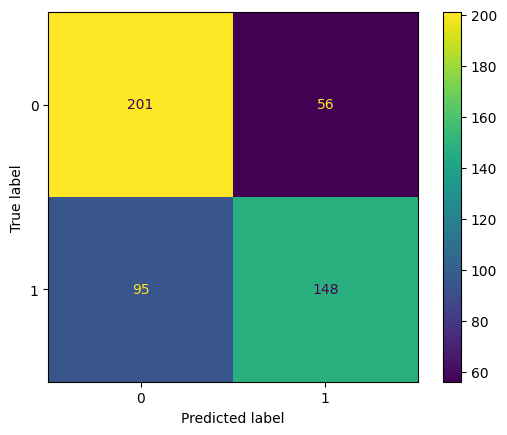

In [78]:
disp = ConfusionMatrixDisplay.from_estimator(
    svm_model,
    X_test_scaled,
    y_test
)

print(disp.confusion_matrix)
plt.show()

In [79]:
param_grid = {
    "C": [0.5, 1, 10, 100],
    "gamma": ["scale", 1, 0.1, 0.01, 0.001],
    "kernel": ["rbf"]
}

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy'
)
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [80]:
final_svm = SVC(C=100, gamma=0.001, kernel="rbf")
final_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001)

[[205  52]
 [ 96 147]]


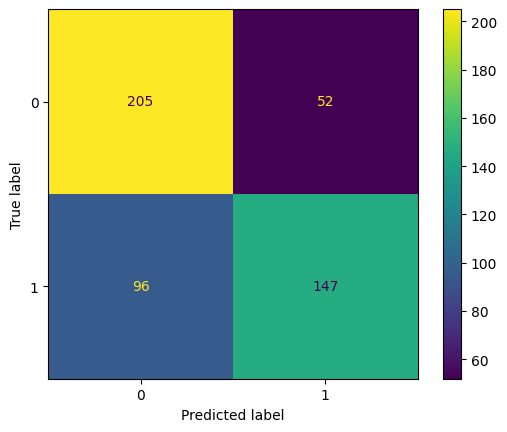

In [81]:
final_disp = ConfusionMatrixDisplay.from_estimator(
    final_svm,
    X_test_scaled,
    y_test
)

print(final_disp.confusion_matrix)
plt.show()